In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#-------------------- 주피터 셀 넓이 조절 ---------------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

sns.set()


In [2]:
df = pd.read_csv('./datasets/craw/craw_ytn_news.csv')

In [3]:
df.head(1)

,title,content,cate,rdate
0,"1단 로켓 고비 넘겼는데, 예상 밖의 복병 3단","[앵커]\r누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다.이성규 기자가 보도합니다.[기자]\r누리호의 심장인 75톤 엔진.지난 2018년, 하나의 엔진으로 구성된 시험 발사는 성공했습니다.누리호는 75톤 엔진 4개를 묶어 1단으로 사용합니다.4개의 엔진이 마치 하나처럼 작동하는 '클러스터링'이라는 고도의 기술이 필요합니다.연구진이 누리호 발사에서 가장 큰 고비로 꼽는 부분이었습니다.[조기주 / 한국항공우주연구원 발사체팀장 : 엔진 4개를 클러스터링하는데 비행 중에 엔진 하나가 오작동하면 발사체의 자세 제어가 힘듭니다. 최악의 경우엔 발사 실패합니다.]하지만 1단과 2단 로켓은 연소와 분리 모두 시원스럽게 통과했습니다.우려가 무색할 정도였습니다.문제는 전혀 고려하지 않았던 3단에서 발생했습니다.7톤급 액체 엔진이 예정했던 연소 시간보다 46초나 덜 타고 꺼져 버린 겁니다.마지막 구간에서 탄력을 받아 초속 7.5km의 속도로 궤도에 진입해야 하는데 그 속도에 도달하는 데 실패한 것입니다.[이상률 / 한국항공우주연구원장 : 세부 원인과 이런 것들은 저희 기술진들이 좀 더 분석하겠다. 부족한 부분은 조사위원회와 내부 검토를 통해 내년 5월에는 문제가 없도록 보완하겠다.]7톤 엔진은 75톤 엔진에 비해 구조가 훨씬 간단해 원인을 찾고 개선하는 데 어려움은 없을 것으로 보입니다.따라서 내년 5월로 예정된 2차 발사에는 완벽한 상태의 누리호로 미완이 아닌 완성된 발사에 도전할 수 있을 전망입니다.YTN 사이언스 이성규입니다.YTN 이성규 (sklee95@ytn.co.kr)",3,2021-10-22 02:53


In [4]:
df['content'].str[-50:]

0        전망입니다.YTN 사이언스 이성규입니다.YTN 이성규 (sklee95@ytn.co.kr)
1        내년 5월 19일로 잠정 결정된 상태입니다.YTN 이승은 (selee@ytn.co.kr)
2       착륙'에 도전하게 됩니다.YTN 정혜윤입니다.YTN 정혜윤 (jdkim@ytn.co.kr)
3       어질 예정입니다.YTN 홍민기입니다.YTN 홍민기 (hongmg1227@ytn.co.kr)
4        관심을 끄는 이유입니다.YTN 기정훈입니다.YTN 기정훈 (prodi@ytn.co.kr)
                               ...                        
1005    겠고요.월요일 서울은 맑은 가운데 영동과 경남에는 비가 내릴 전망입니다.날씨 정보였습니다.
1006     바랍니다.지금까지 YTN 신미림입니다.YTN 신미림 (shinmr21@ytn.co.kr)
1007     바랍니다.지금까지 YTN 신미림입니다.YTN 신미림 (shinmr21@ytn.co.kr)
1008     바랍니다.지금까지 YTN 신미림입니다.YTN 신미림 (shinmr21@ytn.co.kr)
1009     바랍니다.지금까지 YTN 신미림입니다.YTN 신미림 (shinmr21@ytn.co.kr)
Name: content, Length: 1010, dtype: object

#### 정규표현식 사용해 기사글 끝 '기자정보' 지우기

In [5]:
import re
# text = "관심을 끄는 이유입니다.YTN 기정훈입니다.YTN 기정훈 (prodi@ytn.co.kr)"

df['content'] = df['content'].replace(r'\.YTN.+?$', '.', regex=True)
df['content'] = df['content'].replace(r'\.지금까지 YTN.+?$', '.', regex=True)
df.head(1)

,title,content,cate,rdate
0,"1단 로켓 고비 넘겼는데, 예상 밖의 복병 3단","[앵커]\r누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다.이성규 기자가 보도합니다.[기자]\r누리호의 심장인 75톤 엔진.지난 2018년, 하나의 엔진으로 구성된 시험 발사는 성공했습니다.누리호는 75톤 엔진 4개를 묶어 1단으로 사용합니다.4개의 엔진이 마치 하나처럼 작동하는 '클러스터링'이라는 고도의 기술이 필요합니다.연구진이 누리호 발사에서 가장 큰 고비로 꼽는 부분이었습니다.[조기주 / 한국항공우주연구원 발사체팀장 : 엔진 4개를 클러스터링하는데 비행 중에 엔진 하나가 오작동하면 발사체의 자세 제어가 힘듭니다. 최악의 경우엔 발사 실패합니다.]하지만 1단과 2단 로켓은 연소와 분리 모두 시원스럽게 통과했습니다.우려가 무색할 정도였습니다.문제는 전혀 고려하지 않았던 3단에서 발생했습니다.7톤급 액체 엔진이 예정했던 연소 시간보다 46초나 덜 타고 꺼져 버린 겁니다.마지막 구간에서 탄력을 받아 초속 7.5km의 속도로 궤도에 진입해야 하는데 그 속도에 도달하는 데 실패한 것입니다.[이상률 / 한국항공우주연구원장 : 세부 원인과 이런 것들은 저희 기술진들이 좀 더 분석하겠다. 부족한 부분은 조사위원회와 내부 검토를 통해 내년 5월에는 문제가 없도록 보완하겠다.]7톤 엔진은 75톤 엔진에 비해 구조가 훨씬 간단해 원인을 찾고 개선하는 데 어려움은 없을 것으로 보입니다.따라서 내년 5월로 예정된 2차 발사에는 완벽한 상태의 누리호로 미완이 아닌 완성된 발사에 도전할 수 있을 전망입니다.",3,2021-10-22 02:53


In [6]:
df.shape

(1010, 4)

In [7]:
df.isna().sum()

title       0
content    39
cate        0
rdate       0
dtype: int64

In [8]:
isna_idx = df['content'].isna()[df['content'].isna()].index.tolist()
isna_idx[:5]

[7, 22, 55, 157, 271]

In [9]:
df.drop(isna_idx, inplace=True)
print(df.isna().sum())

title      0
content    0
cate       0
rdate      0
dtype: int64


In [10]:
df.shape

(971, 4)

### 1) 벡터화 - 명사만 추출

In [11]:
from konlpy.tag import Kkma  
kkma = Kkma()  
print(kkma.nouns("누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다."))  
# print(kkma.pos("누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다."))  

['누리', '누리호', '호', '발사', '변수', '1', '1단', '단', '로켓', '정상', '작동', '여부', '고비', '성공', '고려', '대상', '3', '3단', '복병', '등장']


In [12]:
# ! pip install customized-konlpy   
from ckonlpy.tag import Twitter
tw = Twitter()  
print(tw.nouns("누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다."))  


['누리', '호', '발사', '가장', '변수', '단', '로켓', '정상', '작동', '여부', '이', '고비', '성공', '전혀', '고려', '대상', '단', '로켓', '복병', '등장']


In [13]:
# from nltk.tokenize import word_tokenize  
# print(word_tokenize("누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다."))  

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tw = Twitter()  
words = tw.nouns("누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다.")
print([lemmatizer.lemmatize(w) for w in words])

['누리', '호', '발사', '가장', '변수', '단', '로켓', '정상', '작동', '여부', '이', '고비', '성공', '전혀', '고려', '대상', '단', '로켓', '복병', '등장']


In [15]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

f = open("stopword_ko.txt", mode='r', encoding="UTF-8")
stopword_ko_list = []
for word in f:
    stopword_ko_list.append(word.rstrip("\n"))
stopword_ko_list.append('[앵커]\r')
stopword_ko_list.append('[기자]\r')
stopword_ko_list.append('[날씨]')
stopword_ko_list.append('[속보]')
stopword_ko_list.append('[영상]')
# [앵커]\r , [기자]\r [날씨] [속보] [영상]

text = "누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다."
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words=stopword_ko_list, ngram_range=(1, 1), max_df=1.0, min_df=0.2)
cvect = tv.fit_transform(df['content'])
vocab_sorted = sorted(tv.vocabulary_.items(), key = lambda x: x[1] if x[1]>5 else 0, reverse = True)
print(vocab_sorted[:20])
# print(tv.vocabulary_)


# cvect = CountVectorizer(stop_words=stopword_ko_list)
# res = cvect.fit_transform([text])
# # print(cvect.vocabulary_)
# vocab_sorted = sorted(cvect.vocabulary_.items(), key = lambda x: x[1] if x[1]>5 else 0, reverse = True)
# print(vocab_sorted)

# cs = cvect.vocabulary_.keys()
# print(cs)



[('지난', 9), ('있습니다', 8), ('있는', 7), ('오늘', 6), ('앵커', 5), ('기자', 2), ('것으로', 1), ('밝혔습니다', 3), ('가운데', 0), ('서울', 4)]


### 2차시도 : 벡터화(단어)
* 벡터화(단어)  --- TFIDF - 코사인유사도 -- topN 유사도 게시글 출력

#### 확정

In [16]:
from ckonlpy.tag import Twitter
tw = Twitter()  
print(tw.nouns("누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다."))  


['누리', '호', '발사', '가장', '변수', '단', '로켓', '정상', '작동', '여부', '이', '고비', '성공', '전혀', '고려', '대상', '단', '로켓', '복병', '등장']


In [17]:
" ".join(['1','2','3'])

'1 2 3'

In [18]:
df = df.rename(columns={'content':'content_orig'})
df.head(1)        


,title,content_orig,cate,rdate
0,"1단 로켓 고비 넘겼는데, 예상 밖의 복병 3단","[앵커]\r누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다.이성규 기자가 보도합니다.[기자]\r누리호의 심장인 75톤 엔진.지난 2018년, 하나의 엔진으로 구성된 시험 발사는 성공했습니다.누리호는 75톤 엔진 4개를 묶어 1단으로 사용합니다.4개의 엔진이 마치 하나처럼 작동하는 '클러스터링'이라는 고도의 기술이 필요합니다.연구진이 누리호 발사에서 가장 큰 고비로 꼽는 부분이었습니다.[조기주 / 한국항공우주연구원 발사체팀장 : 엔진 4개를 클러스터링하는데 비행 중에 엔진 하나가 오작동하면 발사체의 자세 제어가 힘듭니다. 최악의 경우엔 발사 실패합니다.]하지만 1단과 2단 로켓은 연소와 분리 모두 시원스럽게 통과했습니다.우려가 무색할 정도였습니다.문제는 전혀 고려하지 않았던 3단에서 발생했습니다.7톤급 액체 엔진이 예정했던 연소 시간보다 46초나 덜 타고 꺼져 버린 겁니다.마지막 구간에서 탄력을 받아 초속 7.5km의 속도로 궤도에 진입해야 하는데 그 속도에 도달하는 데 실패한 것입니다.[이상률 / 한국항공우주연구원장 : 세부 원인과 이런 것들은 저희 기술진들이 좀 더 분석하겠다. 부족한 부분은 조사위원회와 내부 검토를 통해 내년 5월에는 문제가 없도록 보완하겠다.]7톤 엔진은 75톤 엔진에 비해 구조가 훨씬 간단해 원인을 찾고 개선하는 데 어려움은 없을 것으로 보입니다.따라서 내년 5월로 예정된 2차 발사에는 완벽한 상태의 누리호로 미완이 아닌 완성된 발사에 도전할 수 있을 전망입니다.",3,2021-10-22 02:53


In [19]:
df['content'] = df['content_orig'].apply(lambda x : " ".join(tw.nouns(x)))
df.head(2)

,title,content_orig,cate,rdate,content
0,"1단 로켓 고비 넘겼는데, 예상 밖의 복병 3단","[앵커]\r누리호 발사에 가장 큰 변수는 1단 로켓의 정상 작동 여부였습니다.이 고비는 깨끗하게 성공했는데, 전혀 고려의 대상이 되지 않던 3단 로켓이 복병으로 등장했습니다.이성규 기자가 보도합니다.[기자]\r누리호의 심장인 75톤 엔진.지난 2018년, 하나의 엔진으로 구성된 시험 발사는 성공했습니다.누리호는 75톤 엔진 4개를 묶어 1단으로 사용합니다.4개의 엔진이 마치 하나처럼 작동하는 '클러스터링'이라는 고도의 기술이 필요합니다.연구진이 누리호 발사에서 가장 큰 고비로 꼽는 부분이었습니다.[조기주 / 한국항공우주연구원 발사체팀장 : 엔진 4개를 클러스터링하는데 비행 중에 엔진 하나가 오작동하면 발사체의 자세 제어가 힘듭니다. 최악의 경우엔 발사 실패합니다.]하지만 1단과 2단 로켓은 연소와 분리 모두 시원스럽게 통과했습니다.우려가 무색할 정도였습니다.문제는 전혀 고려하지 않았던 3단에서 발생했습니다.7톤급 액체 엔진이 예정했던 연소 시간보다 46초나 덜 타고 꺼져 버린 겁니다.마지막 구간에서 탄력을 받아 초속 7.5km의 속도로 궤도에 진입해야 하는데 그 속도에 도달하는 데 실패한 것입니다.[이상률 / 한국항공우주연구원장 : 세부 원인과 이런 것들은 저희 기술진들이 좀 더 분석하겠다. 부족한 부분은 조사위원회와 내부 검토를 통해 내년 5월에는 문제가 없도록 보완하겠다.]7톤 엔진은 75톤 엔진에 비해 구조가 훨씬 간단해 원인을 찾고 개선하는 데 어려움은 없을 것으로 보입니다.따라서 내년 5월로 예정된 2차 발사에는 완벽한 상태의 누리호로 미완이 아닌 완성된 발사에 도전할 수 있을 전망입니다.",3,2021-10-22 02:53,앵커 누리 호 발사 가장 변수 단 로켓 정상 작동 여부 이 고비 성공 전혀 고려 대상 단 로켓 복병 등장 이성규 기자 보도 기자 누리 호의 심장 톤 엔진 지난 하나 엔진 구성 시험 발사 성공 누리 호 톤 엔진 개 단 사용 개 엔진 마치 하나 처럼 작 동하 클러스터링 고도 기술 필요 연 구진 누리 호 발사 가장 고비 꼽는 부분 었습니 조기 주 한국 항공우주 연구원 발사체 팀 엔진 개 클러스터링 비행 중 엔진 하나 오작 동하 발사체 자세 제어 최악 경우 발사 실패 단 단 로켓 연소 분리 모두 시원 통과 우려 무색 정도 문제 전혀 고려 단 발생 톤 액체 엔진 예정 연소 시간 덜 타고 마지막 구간 탄력 초속 의 속도 궤도 진입 그 속도 도달 데 실패 것 이상 률 한국 항공우주 연구원 장 세부 원인 것 저희 기술 진 좀 더 분석 부족 부분 조사 위원회 내부 검토 통해 내년 문제 도록 보완 톤 엔진 톤 엔진 구조 간단 원인 개 선하 데 어려움 것 따라서 내년 예정 차 발사 완벽 상태 누리 호로 미완 완성 발사 도전 수 전망
1,"""누리호, 정상 비행은 성공...위성 궤도안착은 실패""","한국형 발사체 누리호가 목표 고도인 700km에는 도달했으나, 탑재체인 '더미 위성'을 궤도에 올려놓는 데는 실패했습니다.임혜숙 과학기술정보통신부 장관은 누리호 발사 결과 브리핑에서 위성 모사체가 700㎞의 고도 목표까지 비행은 성공했지만, 초당 7.5km의 목표 속도에는 미치지 못해 지구 저궤도 안착에는 실패했다고 밝혔습니다.탑재체가 궤도에 안착하지 못한 것은 3단에 달린 7t급 액체엔진의 작동이 목표대로 521초 동안 연소되지 못하고, 475초 만에 조기에 종료돼, 마지막 순간에 충분한 속력을 얻지 못한 탓이라고 설명했습니다.임 장관은 ""누리호 1단부는 75t급 엔진 4기가 클러스터링 돼 300t급의 추력을 내는 게 핵심 기술""이라며 이번 발사를 통해 1단부 비행이 정상적으로 진행됐다고 의미를 부여했습니다.임 장관은 ""또 1단, 페어링, 2단이 분리하고 3단이 성공적으로 점화된 것은 소기의 성과""라며 ""이는 국내의 발사체 기술력이 상당 수준으로 축적됐음을 보여주는 결과""라고 평가했습니다.과기정통부는 발사를 주관한 한국항공우주연구원 연구진과 외부전문가들이 참여하는 '발사조사 위원회'를 즉시 구성해 3단 엔진 조기 종료의 원인을 규명하고, 문제점을 보완해 2차 발사를 추진할 예정입니다.누리호 2차 발사는 내년 5월 19일로 잠정 결정된 상태입니다.",3,2021-10-22 02:50,한국 형 발사체 누리 호가 목표 고도 도달 탑재 체인 더미 위성 궤도 데 실패 임혜숙 과학기술 정보통신부 장관 누리 호 발사 결과 브리핑 위성 모 사체 의 고도 목표 까지 비행 성공 초당 의 목표 속도 지구 저궤도 안착 실패 탑재 체 궤도 안착 못 것 단 급 액체 엔진 작동 목표 대로 동안 연소 못 조기 종료 마지막 순간 충분 속력 얻지 못 탓 설명 임 장관 누리 호 단부 급 엔진 기 클러스터링 급 추력 게 핵심 기술 이 라며 이번 발사 통해 단부 비행 정 상적 진행 의미 부여 임 장관 또 단 페어 링 단 분리 단 성 공적 점화 것 소기 성과 라며 국내 발사체 기술 력 상당 수준 축적 음 보 여주 결과 평가 과기 정통부 발사 주관 한국 항공우주 연구원 연구 진과 외부 전문가 참여 발사 조사 위원회 를 즉시 구성 단 엔진 조기 종료 원인 규명 문제점 보완 차 발사 추진 예정 누리 호 차 발사 내년 일로 잠정 결정 상태


### 2) TFIDF 메트릭스

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
tfidf= TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['content'])
print(tfidf_matrix.shape)

(971, 8535)


### 3) 코사인 유사도 (917 * 917)

In [22]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.41650603 0.21531644 ... 0.00978503 0.00947546 0.01061451]
 [0.41650603 1.         0.31426303 ... 0.0064539  0.00692662 0.00601785]
 [0.21531644 0.31426303 1.         ... 0.01129151 0.01112177 0.01186432]
 ...
 [0.00978503 0.0064539  0.01129151 ... 1.         0.903715   0.88877299]
 [0.00947546 0.00692662 0.01112177 ... 0.903715   1.         0.88692187]
 [0.01061451 0.00601785 0.01186432 ... 0.88877299 0.88692187 1.        ]]


### 4) 검색어와 관련된 TopN 유사도 게시글 출력

In [23]:
titls_ss = pd.Series(df.index, index=df['title']).drop_duplicates()
titls_ss

title
1단 로켓 고비 넘겼는데, 예상 밖의 복병 3단               0
"누리호, 정상 비행은 성공...위성 궤도안착은 실패"           1
날씨 변수 뚫고 발사했는데...'누리호' 5번 더 쏜다!          2
누리호 미완의 도전...발사는 성공·임무는 실패               3
'뉴 스페이스' 시대, 'K-스페이스' 존재감 알렸다            4
                                      ... 
[날씨] 내일 중부 흐리고 선선...동해안 비             1005
[날씨] 절기 '한로' 전국 비...임실에 가을꽃 만발        1006
[날씨] 절기 '한로' 전국 비...임실에 퍼지는 국화꽃 향기    1007
[날씨] 절기 '한로' 전국 곳곳 비...임실에는 국화꽃 가득    1008
[날씨] 전국 곳곳 비, 한낮 선선...임실에는 국화꽃 만발     1009
Length: 971, dtype: int64

In [24]:
def get_recommendations(title, cosine_sim = cosine_sim):
    #idx = titls_ss[title]
    idx = df['title'].str.contains('누리호', case=False).sort_values(ascending=False).head(1).index.values
    
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))   #[(0, 0.11195519797612277) ... (917, 0.17512497546806288)..]
    
    score   =  [x[1] for x in sim_scores]            #[0.11195519797612277 ... , 0.17512497546806288..]  917
    df['cos_score'] = np.array(score).reshape(-1,1)
    
    sim_scores= sorted(sim_scores, key= lambda x: x[1], reverse=True)   
    topN_idx   =  [x[0] for x in sim_scores][1:11]     # x[0]:인덱스  x[1]:유사도점수    
    print(topN_idx)
    
    sim_scores = sim_scores[1:11] 
    return df[['title','cate','rdate','cos_score']].iloc[topN_idx]
   

In [25]:
get_recommendations('누리호')

[406]
[]


,title,cate,rdate,cos_score


###  뉴스 그룹별 주요 키워드 top10

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
def search_news(min='2021-07-25 03:22', max='2021-10-25 20:40'):
    sdf = df[(df['rdate']>=min) & (df['rdate']>=max)]
    
    tv = TfidfVectorizer()  #stop_words=stopword_ko_list, ngram_range=(1, 1), max_df=1.0, min_df=0.2)
    tfidf_matrix = tv.fit_transform(sdf['content'])  
    print(tfidf_matrix.toarray().shape) 

    word_count_df = pd.DataFrame({
        '단어': tv.get_feature_names(),
        '빈도': np.round(tfidf_matrix.sum(axis=0).flat,2)
    })
    word_count_df = word_count_df.sort_values('빈도', ascending=False).head(10)
    res = list(zip(word_count_df['단어'],word_count_df['빈도']))
    print(res)
        
    print("-----------")    
    cate_list = ['경제', '사회', '과학', '문화', '재난', '날씨']
    for i,cate in enumerate(cate_list):
        tv = TfidfVectorizer()  #stop_words=stopword_ko_list, ngram_range=(1, 1), max_df=1.0, min_df=0.2)
        tfidf_matrix = tv.fit_transform(sdf[sdf['cate']==i+1]['content'])  
        print(tfidf_matrix.toarray().shape) 

        word_count_df2 = pd.DataFrame({
            '단어': tv.get_feature_names(),
            '빈도': np.round(tfidf_matrix.sum(axis=0).flat,2)
        })
        word_count_df2 = word_count_df2.sort_values('빈도', ascending=False).head(10)
        res = list(zip(word_count_df2['단어'],word_count_df2['빈도']))
        print(f'{cate} : {res}')
        
        fig = plt.figure()
        text = " ".join(word_count_df2['단어'])
        wordcloud = WordCloud(max_font_size=100, font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')

(955, 8325)
[('기온', 46.78), ('오늘', 34.64), ('발사', 34.45), ('서울', 33.34), ('까지', 31.18), ('내일', 26.35), ('누리', 26.26), ('접종', 25.2), ('아침', 24.48), ('날씨', 22.08)]
-----------
(146, 2736)
경제 : [('후보', 9.39), ('대표', 8.95), ('대선', 6.97), ('의원', 6.9), ('국민', 5.85), ('민주당', 5.79), ('대통령', 5.78), ('이재명', 5.38), ('이낙연', 4.51), ('윤석열', 4.22)]
(172, 2853)
사회 : [('대출', 5.52), ('인하', 4.51), ('유류', 4.38), ('정부', 4.24), ('가격', 4.01), ('부총리', 3.92), ('방송', 3.61), ('거래', 3.31), ('상승', 3.28), ('올해', 3.23)]
(115, 2126)
과학 : [('발사', 19.44), ('누리', 14.84), ('우주', 10.02), ('분리', 6.23), ('발사체', 5.55), ('성공', 5.5), ('위성', 5.47), ('기술', 5.38), ('고도', 5.27), ('예정', 5.04)]
(164, 3963)
문화 : [('게임', 6.81), ('오징어', 5.9), ('작품', 4.92), ('넷플릭스', 4.25), ('영화', 4.25), ('한국', 4.12), ('세계', 3.39), ('배우', 3.21), ('까지', 3.13), ('기자', 3.12)]
(164, 2358)
재난 : [('접종', 17.38), ('진자', 11.49), ('백신', 9.69), ('회복', 9.66), ('일상', 9.53), ('단계', 9.17), ('환자', 9.05), ('코로나', 8.61), ('신규', 7.79), ('완료', 7.55)]
(194, 1010)
날씨 : [('기온'

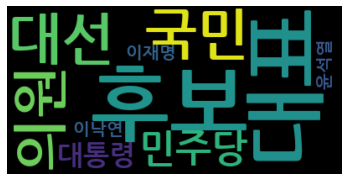

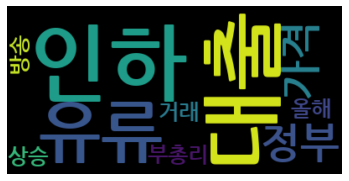

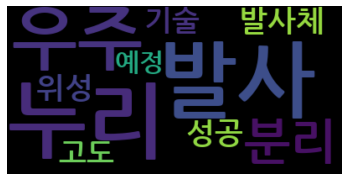

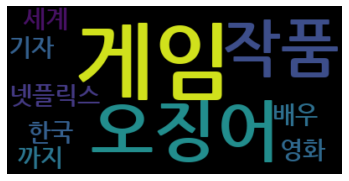

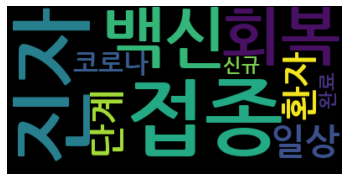

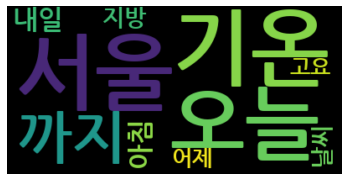

In [74]:
search_news(min='2021-07-25', max='2021-08-25')

(945, 8212)
[('기온', 46.7), ('오늘', 34.51), ('발사', 33.31), ('서울', 33.23), ('까지', 31.07), ('내일', 26.29), ('누리', 25.48), ('접종', 25.18), ('아침', 24.47), ('날씨', 22.04)]
-----------
(146, 2736)
경제 : [('후보', 9.39), ('대표', 8.95), ('대선', 6.97), ('의원', 6.9), ('국민', 5.85), ('민주당', 5.79), ('대통령', 5.78), ('이재명', 5.38), ('이낙연', 4.51), ('윤석열', 4.22)]
(172, 2853)
사회 : [('대출', 5.52), ('인하', 4.51), ('유류', 4.38), ('정부', 4.24), ('가격', 4.01), ('부총리', 3.92), ('방송', 3.61), ('거래', 3.31), ('상승', 3.28), ('올해', 3.23)]
(105, 1883)
과학 : [('발사', 17.99), ('누리', 13.8), ('우주', 9.66), ('분리', 5.91), ('성공', 5.4), ('발사체', 5.37), ('위성', 5.26), ('기술', 5.24), ('고도', 5.12), ('예정', 4.94)]
(164, 3963)
문화 : [('게임', 6.81), ('오징어', 5.9), ('작품', 4.92), ('넷플릭스', 4.25), ('영화', 4.25), ('한국', 4.12), ('세계', 3.39), ('배우', 3.21), ('까지', 3.13), ('기자', 3.12)]
(164, 2358)
재난 : [('접종', 17.38), ('진자', 11.49), ('백신', 9.69), ('회복', 9.66), ('일상', 9.53), ('단계', 9.17), ('환자', 9.05), ('코로나', 8.61), ('신규', 7.79), ('완료', 7.55)]
(194, 1010)
날씨 : [('기온', 

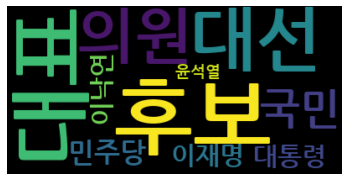

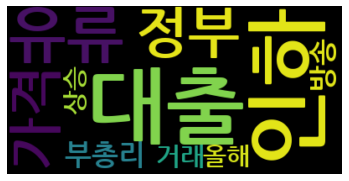

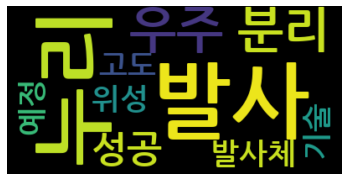

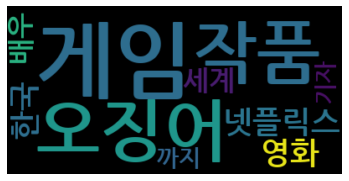

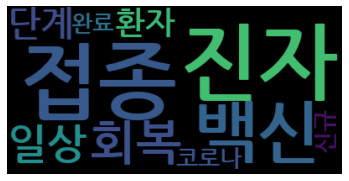

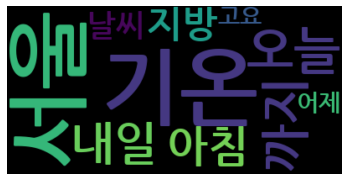

In [75]:
search_news(min='2021-08-25', max='2021-09-25')

(159, 3269)
[('후보', 5.4), ('오늘', 4.64), ('회복', 4.46), ('대선', 4.28), ('국민', 4.26), ('대통령', 4.12), ('접종', 3.95), ('까지', 3.78), ('민주당', 3.74), ('일상', 3.57)]
-----------
(75, 2003)
경제 : [('후보', 4.29), ('대선', 3.49), ('대통령', 3.4), ('국민', 3.17), ('민주당', 3.0), ('의원', 2.94), ('대표', 2.73), ('이재명', 2.54), ('면서', 2.09), ('오늘', 2.08)]
(39, 1127)
사회 : [('인터넷', 2.16), ('분기', 1.61), ('장애', 1.54), ('환율', 1.32), ('원인', 1.19), ('방송', 1.17), ('서비스', 1.14), ('오늘', 1.14), ('발생', 1.13), ('지난해', 1.11)]
(1, 67)
과학 : [('수집', 0.34), ('자료', 0.26), ('시간', 0.26), ('발사', 0.26), ('누리', 0.26), ('계획', 0.17), ('데이터', 0.17), ('팔라우', 0.17), ('조사', 0.17), ('엔진', 0.17)]
(8, 305)
문화 : [('태극기', 0.64), ('문화재', 0.63), ('문화', 0.62), ('애플', 0.58), ('한류', 0.55), ('콘서트', 0.53), ('콘텐츠', 0.51), ('제주', 0.48), ('한국', 0.44), ('도시', 0.44)]
(27, 984)
재난 : [('접종', 2.92), ('회복', 2.41), ('일상', 2.36), ('환자', 2.08), ('단계', 1.97), ('백신', 1.82), ('까지', 1.53), ('정부', 1.53), ('오늘', 1.41), ('시설', 1.41)]
(9, 174)
날씨 : [('기온', 2.35), ('오늘', 1.43), ('

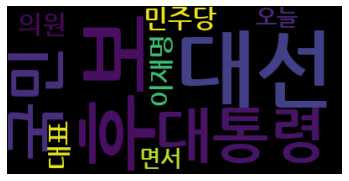

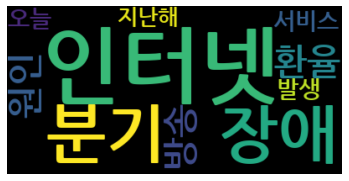

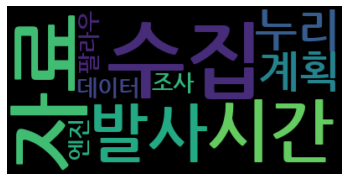

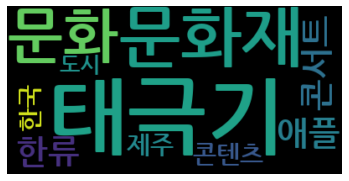

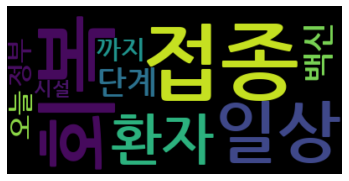

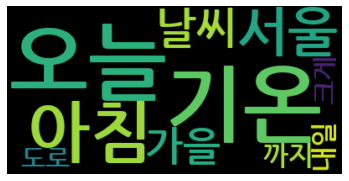

In [76]:
search_news(min='2021-09-25', max='2021-10-25')

In [69]:
df[df['content'].str.contains('대출', case=False)].sort_values(by='rdate', ascending=False)[['title','cate','rdate']].head()

,title,cate,rdate
183,"금융그룹, 코로나19에도 올해 역대 최대 이익 예상",2,2021-10-25 18:01
173,"[기업] 카카오페이 ""국민 생활 금융 플랫폼이 목표""",2,2021-10-25 16:49
659,"'24시간 영업 가능' 방역체계 초안에 ""환영·기대 속 우려도""",5,2021-10-25 16:15
307,"고승범 ""가계부채, 우리 경제 최대 잠재 위협요인""",1,2021-10-25 13:12
296,"홍준표 ""당선 시 비상경제위 출범·부동산 규제 철폐"" 경제 공약 발표",1,2021-10-25 10:52


### 워드클라우드

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()

text = " ".join(df['title'])
wordcloud = WordCloud(max_font_size=100, font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')